In [1]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5955 sha256=4356974e9a5b313c63833d3a9f0d849f270454cb60e899c79f0aa1977a678b1a
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('healthcare_dataset.csv')

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [5]:
transactions = dataset['Medical Condition'].apply(lambda x: x.split(',')).tolist()
print(transactions[:5])


[['Cancer'], ['Obesity'], ['Obesity'], ['Diabetes'], ['Cancer']]


In [6]:
from apyori import apriori
min_support = 0.001
min_confidence = 0.1
min_lift = 1
min_length = 2
max_length = 2

rules = apriori(transactions, min_support=min_support, min_confidence=min_confidence, min_lift=min_lift, min_length=min_length, max_length=max_length)


In [7]:
results = list(rules)

In [8]:
print(results)

[RelationRecord(items=frozenset({'Arthritis'}), support=0.1677117117117117, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Arthritis'}), confidence=0.1677117117117117, lift=1.0)]), RelationRecord(items=frozenset({'Asthma'}), support=0.1654954954954955, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Asthma'}), confidence=0.1654954954954955, lift=1.0)]), RelationRecord(items=frozenset({'Cancer'}), support=0.16625225225225226, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Cancer'}), confidence=0.16625225225225226, lift=1.0)]), RelationRecord(items=frozenset({'Diabetes'}), support=0.16763963963963963, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Diabetes'}), confidence=0.16763963963963963, lift=1.0)]), RelationRecord(items=frozenset({'Hypertension'}), support=0.16657657657657657, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items

In [9]:
if results:
    for rule in results:
        items = [x for x in rule.items]
        print(f"Rule: {items}")
        print(f"Support: {rule.support}")
        print(f"Confidence: {rule.ordered_statistics[0].confidence}")
        print(f"Lift: {rule.ordered_statistics[0].lift}")
        print("-" * 20)
else:
    print("No rules found. Consider adjusting the parameters.")

Rule: ['Arthritis']
Support: 0.1677117117117117
Confidence: 0.1677117117117117
Lift: 1.0
--------------------
Rule: ['Asthma']
Support: 0.1654954954954955
Confidence: 0.1654954954954955
Lift: 1.0
--------------------
Rule: ['Cancer']
Support: 0.16625225225225226
Confidence: 0.16625225225225226
Lift: 1.0
--------------------
Rule: ['Diabetes']
Support: 0.16763963963963963
Confidence: 0.16763963963963963
Lift: 1.0
--------------------
Rule: ['Hypertension']
Support: 0.16657657657657657
Confidence: 0.16657657657657657
Lift: 1.0
--------------------
Rule: ['Obesity']
Support: 0.1663243243243243
Confidence: 0.1663243243243243
Lift: 1.0
--------------------


In [10]:
def inspect(results):
    lhs = []
    rhs = []
    supports = []
    confidences = []
    lifts = []

    for rule in results:
        for ordered_stat in rule.ordered_statistics:
            lhs.append(', '.join([str(item) for item in ordered_stat.items_base]))
            rhs.append(', '.join([str(item) for item in ordered_stat.items_add]))
            supports.append(rule.support)
            confidences.append(ordered_stat.confidence)
            lifts.append(ordered_stat.lift)

    return list(zip(lhs, rhs, supports, confidences, lifts))

results_in_dataframe = pd.DataFrame(inspect(results), columns=['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])


In [11]:
print(results_in_dataframe)

  Left Hand Side Right Hand Side   Support  Confidence  Lift
0                      Arthritis  0.167712    0.167712   1.0
1                         Asthma  0.165495    0.165495   1.0
2                         Cancer  0.166252    0.166252   1.0
3                       Diabetes  0.167640    0.167640   1.0
4                   Hypertension  0.166577    0.166577   1.0
5                        Obesity  0.166324    0.166324   1.0


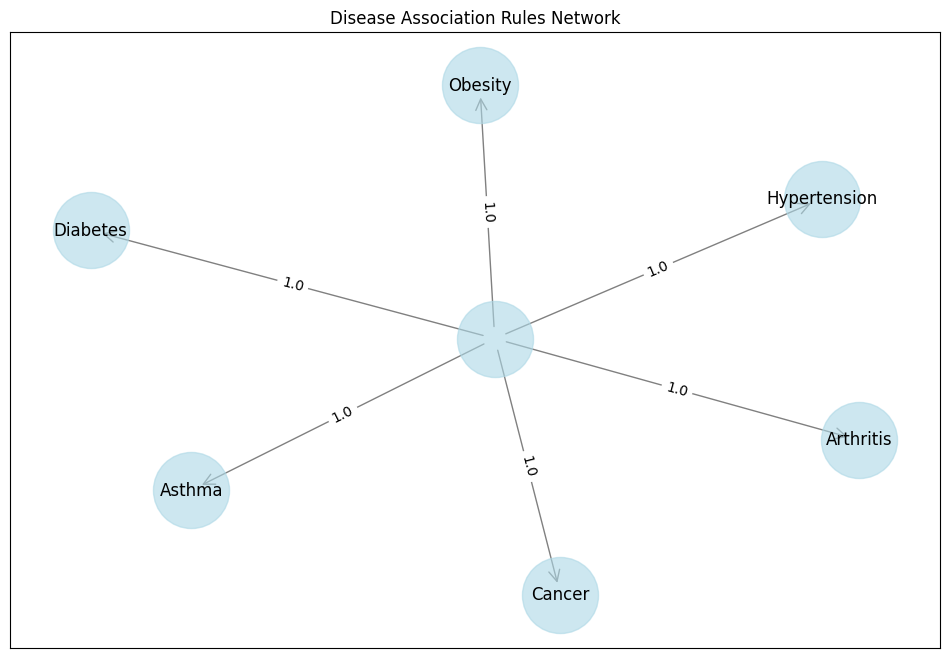

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

for index, row in results_in_dataframe.iterrows():
    lhs = row['Left Hand Side'].split(', ')
    rhs = row['Right Hand Side'].split(', ')
    for item in lhs:
        for target in rhs:
            if item != target:
                G.add_edge(item, target, weight=row['Lift'])

pos = nx.spring_layout(G)
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color='lightblue', alpha=0.6)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), arrowstyle='->', arrowsize=20, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Disease Association Rules Network')
plt.show()


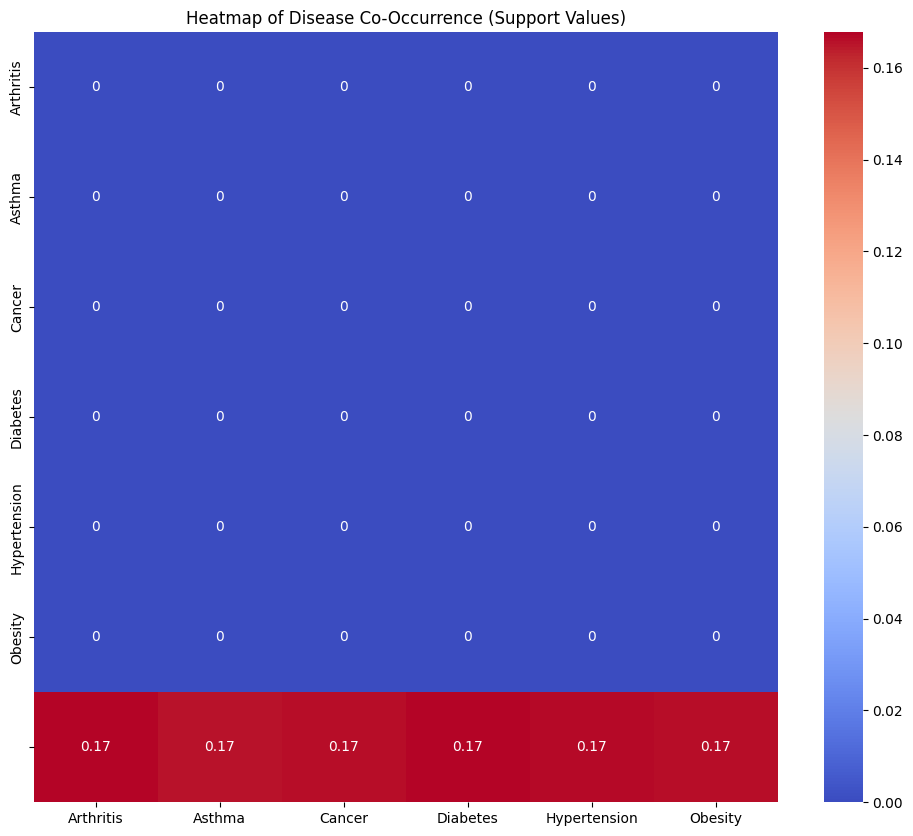

In [14]:
import seaborn as sns
diseases = sorted(set(item for sublist in transactions for item in sublist))
heatmap_matrix = pd.DataFrame(0, index=diseases, columns=diseases)

for index, row in results_in_dataframe.iterrows():
    lhs = row['Left Hand Side']
    rhs = row['Right Hand Side']
    heatmap_matrix.loc[lhs, rhs] = row['Support']

plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Disease Co-Occurrence (Support Values)')
plt.show()

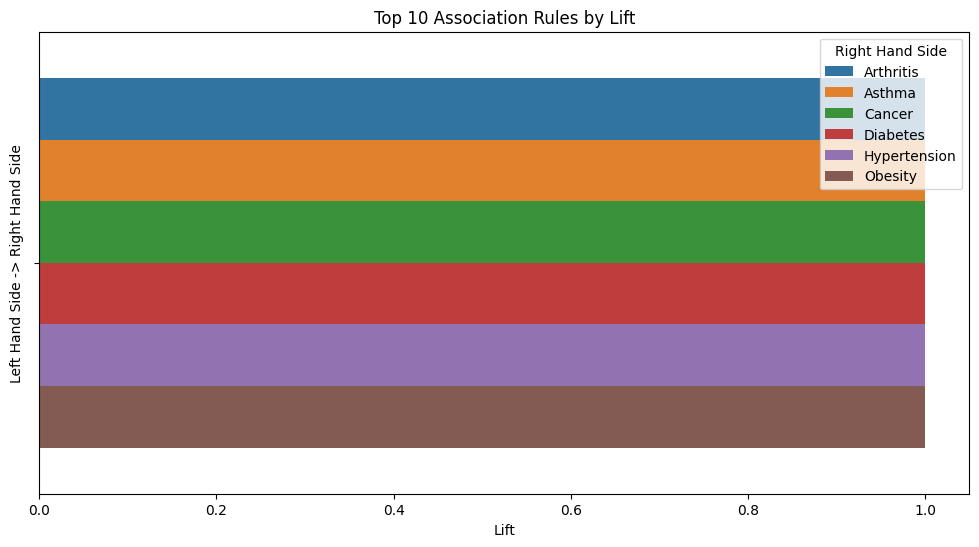

In [15]:
sorted_results = results_in_dataframe.sort_values(by='Lift', ascending=False).head(10)


plt.figure(figsize=(12, 6))
sns.barplot(x='Lift', y='Left Hand Side', hue='Right Hand Side', data=sorted_results)
plt.title('Top 10 Association Rules by Lift')
plt.xlabel('Lift')
plt.ylabel('Left Hand Side -> Right Hand Side')
plt.legend(title='Right Hand Side')
plt.show()

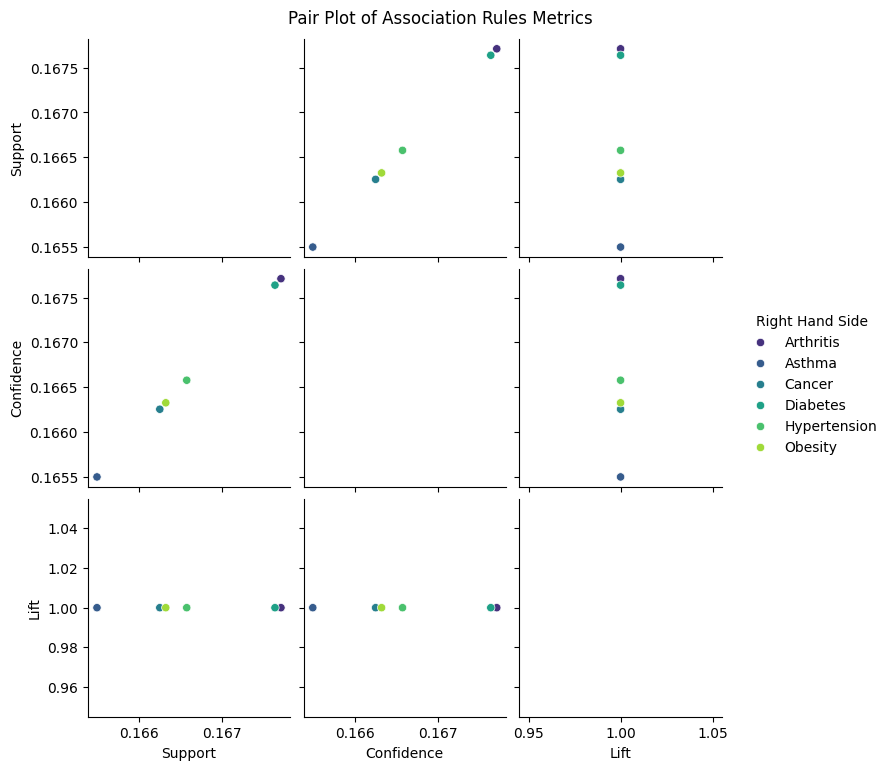

In [16]:

sns.pairplot(results_in_dataframe, vars=['Support', 'Confidence', 'Lift'], hue='Right Hand Side', palette='viridis')
plt.suptitle('Pair Plot of Association Rules Metrics', y=1.02)
plt.show()
